In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [9]:
# Read the csv file into a pandas DataFrame

wine = pd.read_csv('../Resources/grapes.csv')
wine.head()

,time,Precipitation,Grapes,Temperature,Ozone
0,2011,24.054138,8484,56.203448,197.425926
1,2012,31.118621,14193,58.027586,219.462963
2,2013,8.876034,14551,58.167241,193.796296
3,2014,26.120172,14128,60.318966,207.444444
4,2015,17.590517,9769,59.756897,214.685185


In [10]:
# Assign the data to X and y

X = wine[["Ozone", "Grapes"]]
y = wine["time"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9, 2) (9, 1)


In [11]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [12]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8164772146733615
Testing Score: -1.1780067947842099


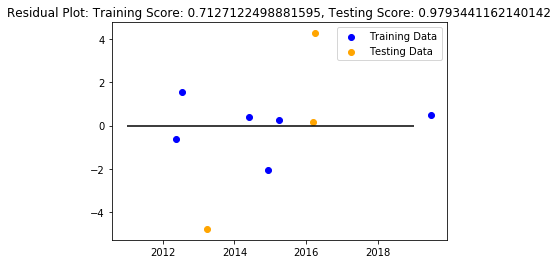

In [17]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot: Training Score: 0.8164772146733615 Testing Score: -1.1780067947842099")
plt.savefig("Ozone_visual.jpg")

In [16]:
plt.savefig("Ozone_visual.jpg")

<Figure size 432x288 with 0 Axes>

In [71]:
pickle.dump(model, open('model.pkl','wb'))